In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../')
import utils_auto 

# Configuration

In [3]:
trial_idx=6
paper='1508.00296'

# Code-generation prompts

In [4]:
prompt=(utils_auto.generate_prompt(template='prompt.md',docstring='docstring.md',paper=paper,save=True,trial_idx=trial_idx))

In [5]:
print(prompt)

You are a condensed matter physicist working on the numerical calculation for the Hamiltonian of a system using the Hartree Fock method. I will provide you with the physical Hamitonian written in second quantized form as an equation in LaTeX. You should convert it into a class for the HartreeFockHamiltonian using Python and necessary packages, such as numpy and scipy.
This is a multiple-step problem, and you will execute this process by analyzing the equation and answering smaller questions sequentially in order to finally generate the class. The class has the following structure:

CLASS DOCSTRING: 
```
class HartreeFockHamiltonian:
  def __init__(self, N_shell, parameters:dict[str, Any], filling_factor: float=0.5):
    self.lattice = 'square' | 'triangular'
    self.D = # LLM Task: has to define this tuple.
    self.basis_order = {'0': 'flavor_type_0', '1': 'flavor_type_1', ... 'D-1': 'flavor_type_D-1'}
    # this is the basis order that the Hamiltonian will follow

    # Occupancy re

# LLM-Generated code

In [6]:
generated_code = utils_auto.code_generate(prompt,max_tokens=25600,budget_tokens=12800,)


#################### THINKING ####################

Let's work on this problem step by step. First, I'll analyze the Hamiltonian equation to identify the dimensions and basis ordering.

**Step 1: Identify the dimension and basis order (D)**

Looking at the Hamiltonian, I can see operators $a^\dagger_{k\sigma}$, $a_{k\sigma}$, $b^\dagger_{k\sigma}$, and $b_{k\sigma}$ where $\sigma$ represents spin.

The operators $a$ and $b$ seem to represent different types of atoms or orbitals (N and B atoms as described in the problem). The index $\sigma$ likely represents spin (up and down).

So the flavors in this system are:
1. Atom type (N or B) - 2 types
2. Spin ($\sigma$) - 2 types (up and down)

This gives us D = (2, 2) where the first dimension is the atom type and the second is the spin.

**Basis order:**
0: Atom type (N and B)
1: Spin (up and down)

**Step 2: Identify Interacting and Non-Interacting Terms**

Let's identify the terms in the Hamiltonian:

Non-interacting terms (H_nonint):
1.

In [7]:
print(generated_code['thinking'])

Let's work on this problem step by step. First, I'll analyze the Hamiltonian equation to identify the dimensions and basis ordering.

**Step 1: Identify the dimension and basis order (D)**

Looking at the Hamiltonian, I can see operators $a^\dagger_{k\sigma}$, $a_{k\sigma}$, $b^\dagger_{k\sigma}$, and $b_{k\sigma}$ where $\sigma$ represents spin.

The operators $a$ and $b$ seem to represent different types of atoms or orbitals (N and B atoms as described in the problem). The index $\sigma$ likely represents spin (up and down).

So the flavors in this system are:
1. Atom type (N or B) - 2 types
2. Spin ($\sigma$) - 2 types (up and down)

This gives us D = (2, 2) where the first dimension is the atom type and the second is the spin.

**Basis order:**
0: Atom type (N and B)
1: Spin (up and down)

**Step 2: Identify Interacting and Non-Interacting Terms**

Let's identify the terms in the Hamiltonian:

Non-interacting terms (H_nonint):
1. $t_{\rm N} \sum_{k, \sigma} a^{\dagger}_{k \sigma} a

In [8]:
print(generated_code['text'])

# ANSWER:

1) Tuple of Flavors (D) = (4,)
Basis Order:
0: atom_spin. Order: N_up, N_down, B_up, B_down

2) EXP-VAL DEPENDENT TERMS: {
    "\langle a^{\dagger}_{k, \sigma} a_{k, \sigma} \rangle": "Mean of exp_val for N atoms with spin σ (indices 0 and 1)",
    "\langle b^{\dagger}_{k, \sigma} b_{k, \sigma} \rangle": "Mean of exp_val for B atoms with spin σ (indices 2 and 3)"
}

TERMS:
- $t_{\rm N} \sum_{k, \sigma} a^{\dagger}_{k \sigma} a_{k \sigma} \sum_n e^{-ik\cdot n}$ -> H[0, 0, :] and H[1, 1, :], NI
- $t_{\rm B} \sum_{k, \sigma} b^{\dagger}_{k \sigma} b_{k \sigma} \sum_n e^{-ik\cdot n}$ -> H[2, 2, :] and H[3, 3, :], NI
- $t_{\rm BN} \sum_{k, \sigma} a^{\dagger}_{k \sigma} b_{k \sigma} \sum_{n'} \exp{-ik\cdot n'}$ -> H[0, 2, :] and H[1, 3, :], NI
- $t_{\rm BN} \sum_{k, \sigma} b^{\dagger}_{k \sigma} a_{k \sigma} \sum_{n'} \exp{ik\cdot n'}$ -> H[2, 0, :] and H[3, 1, :], NI
- $\Delta \sum_{k, \sigma} a^{\dagger}_{k \sigma} a_{k \sigma}$ -> H[0, 0, :] and H[1, 1, :], NI
- $\frac{U_{\rm

In [9]:
code = utils_auto.extract_code(generated_code['text'])

In [10]:
print(code)

import numpy as np
from typing import Any
from HF import *

class HartreeFockHamiltonian:
    """
    Hartree-Fock Hamiltonian for a square-centered lattice with N atoms at vertices and B atoms at centers.
    
    Args:
        N_shell: Number of shells in k-space.
        parameters: Dictionary of model parameters.
        filling_factor: Occupancy factor for states.
    """
    def __init__(self, N_shell: int, parameters: dict[str, Any]={'t_N': 1.0, 't_B': 1.0, 't_BN': 0.5, 'Delta': 0.0, 'U_N': 3.0, 'U_B': 0.0, 'V_B': 0.65, 'V_BN': 1.0}, filling_factor: float=0.5):
        self.lattice = 'square'   # Square-centered lattice
        self.D = (4,)  # N_up, N_down, B_up, B_down
        self.basis_order = {'0': 'atom_spin'}
        # Order: 0: N_up, 1: N_down, 2: B_up, 3: B_down
        
        # Occupancy relevant parameters
        self.nu = filling_factor
        self.T = parameters.get('T', 0)  # Temperature, default to 0
        self.a = parameters.get('a', 1.0)  # Lattice constan

In [11]:
utils_auto.save_code(code,paper,trial_idx)

Code saved to code_1508_00296_6.py


# Code evaluation

In [12]:
code_path = 'code_{int}_{decimal}_{trial_idx}'.format(int=paper.split('.')[0],decimal=paper.split('.')[1],trial_idx=trial_idx) 

In [13]:
import importlib

In [14]:
module = importlib.import_module(code_path)

In [15]:
import HF

## Task 1: Check k-space

In [16]:
ham = module.HartreeFockHamiltonian(N_shell=10,)

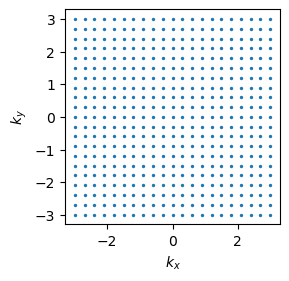

In [17]:
fig1=utils_auto.plot_kspace(kspace=ham.k_space)

## Task 2: Check energy dispersion for non-interacting term

In [18]:
ham = module.HartreeFockHamiltonian(N_shell=10,parameters={'Delta':0},filling_factor=1/2)


In [19]:
h_nonint = ham.generate_non_interacting()

In [20]:
wf,en= HF.diagonalize(h_nonint) # or HF.diagonalize

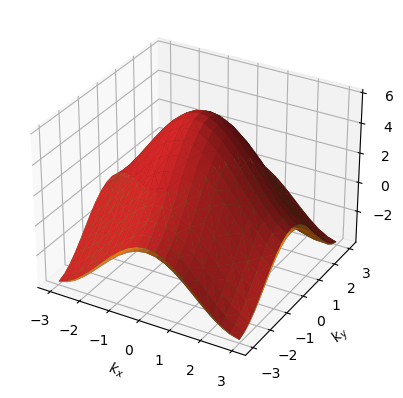

In [21]:
utils_auto.plot_2d_bandstructure(ham,en)

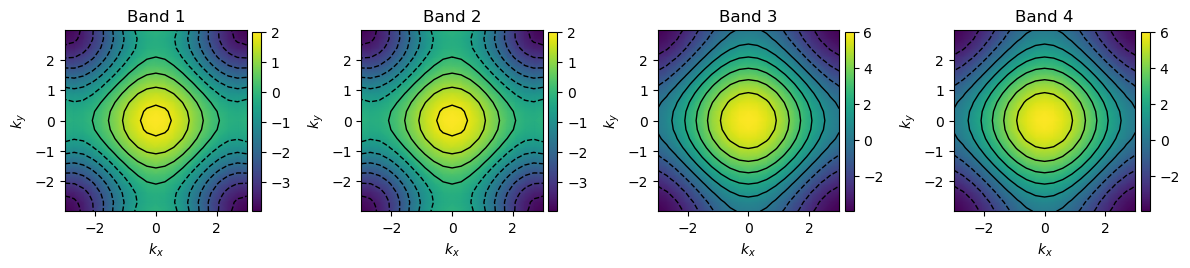

In [22]:
fig2=utils_auto.plot_2d_false_color_map(ham,en)

## Task 3: Infinitesemial U limit

In [23]:
ham_int= module.HartreeFockHamiltonian(N_shell=10,  
parameters={'V_BN':1e-5,'U_N':0,'U_B':0,'V_B':0},filling_factor=1/2)

In [24]:
wf,en= HF.diagonalize(ham_int.generate_non_interacting())
exp_val= HF.get_exp_val(wf,en,1/2,0)
exp_val=HF.unflatten(exp_val,ham_int.D,ham.N_k)

In [25]:
wf_int, en_int, exp_val_int= HF.solve(ham_int,exp_val,100)

Convergence reached at iteration 0


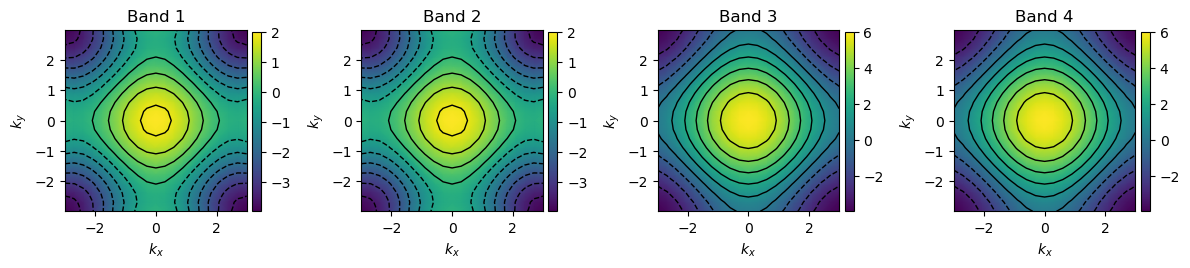

In [26]:
fig3=utils_auto.plot_2d_false_color_map(ham_int,en_int)

## Task 4: Large U limit

In [27]:
ham_int= module.HartreeFockHamiltonian(N_shell=10,  parameters={'V_BN':1e5,'U_N':0,'U_B':0,'V_B':0},filling_factor=1/2)


In [28]:
h_nonint=ham_int.generate_non_interacting()
h_nonint[0,0,:]-=100
h_nonint[1,1,:]-=100
wf,en=HF.diagonalize(h_nonint)
exp_val=HF.get_exp_val(wf,en,1/2,0)
exp_val=HF.unflatten(exp_val,ham_int.D,ham.N_k)

In [29]:
wf_int, en_int, exp_val_int=HF.solve(ham_int,exp_val,99)

Convergence reached at iteration 6


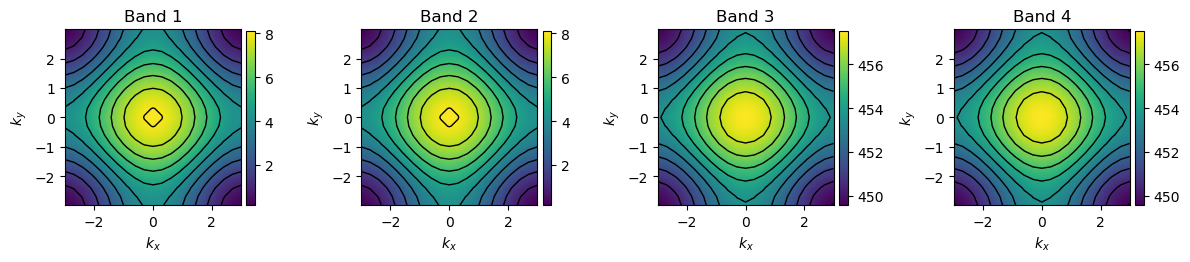

In [30]:
fig4=utils_auto.plot_2d_false_color_map(ham_int,en_int)

In [31]:
utils_auto.print_gap(ham_int,exp_val,en_int,2)

Gap is 441.45
U/T is 93.50
mean_U is 56.95


# Auto eval

## Task 1

In [32]:
result1 = utils_auto.vision_eval(
    fig=fig1, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics1.md', image='image1.md', paper=paper)
    )


#################### THINKING ####################

Let me analyze the image and the provided problem statement to evaluate whether the image correctly represents the momentum space mesh in the first Brillouin zone for the given problem.

First, let's understand what the image shows:
- The image displays a 2D grid of blue dots in a square region
- The x-axis is labeled as k_x, ranging from approximately -3 to 3
- The y-axis is labeled as k_y, ranging from approximately -3 to 3
- The dots form a uniform grid covering this square region

Now, let's examine the problem:
1. The Hamiltonian is for a square-centered lattice system with two types of atoms (N atoms at vertices, B atoms at centers)
2. The Hamiltonian includes hopping terms (t_N, t_B, t_BN) and interaction terms (U_N, U_B, V_B, V_BN)

For a square-centered lattice:
- The real-space lattice has N atoms at the vertices of squares and B atoms at the centers
- The corresponding Brillouin zone should be square-shaped for a square la

In [33]:
answer1=utils_auto.extract_result_content(result1['text'])

## Task 2

In [34]:
result2 = utils_auto.vision_eval(
    fig=fig2, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics2.md', image='image2.md', paper=paper)
    )


#################### THINKING ####################

Let me analyze the band structure plots according to the rubric:

1. First, identify the shape of the Brillouin zone boundary and confirm it matches what's expected for a square-centered lattice.

Looking at the image, I can see four panels labeled Band 1, Band 2, Band 3, and Band 4. In each panel, the x and y axes are labeled kx and ky, and they range from approximately -3 to 3. The plots are showing the energy dispersion in k-space (momentum space).

For a square-centered lattice (where N atoms are at vertices and B atoms at centers), the first Brillouin zone should be square-shaped. The plots in the image show a square region of k-space, with kx and ky axes extending from approximately -3 to 3. This is consistent with a square-shaped Brillouin zone.

2. Next, examine the symmetry of the energy distribution shown by the false color plot:

2.1 Identify the highest energy regions (yellow):
In all four bands, the highest energy (yello

In [35]:
answer2=utils_auto.extract_result_content(result2['text'])

## Task 3

In [36]:
result3 = utils_auto.vision_eval(
    fig=fig3, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics3.md', image='image3.md', paper=paper,Gap=0,nu=1/2)
    )


#################### THINKING ####################

Let me analyze this image based on the rubric.

The image shows four panels labeled "Band 1", "Band 2", "Band 3", and "Band 4", which represent false-color plots of the band structure in the first Brillouin zone for all bands after a self-consistent Hartree-Fock calculation with infinitesimal interaction.

Let's go through the rubric step by step:

1. First, identify the shape of the Brillouin zone boundary and confirm it matches what's expected for a square-centered lattice:

Looking at the plots, I can see that the Brillouin zone is shown as a square with k_x and k_y axes extending from approximately -3 to 3. This is consistent with a square-centered lattice, where the Brillouin zone would be square-shaped. So this point is correct.

2. Next, examine the symmetry of the energy distribution shown by the false color plot:

2.1 Identify the highest energy regions (yellow):
In all four bands, the highest energy regions (yellow) appear 

In [37]:
answer3=utils_auto.extract_result_content(result3['text'])

## Task 4

In [38]:
result4 = utils_auto.vision_eval(
    fig=fig4, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics4.md', image='image4.md', paper=paper,U_int='V_BN = 1e5',nu=1/2)
    )


#################### THINKING ####################

I need to evaluate the band structure plots shown in the image and determine whether they correctly represent the expected results for a Hartree-Fock calculation of the given Hamiltonian on a square-centered lattice. Let me go through the rubric step by step.

First, let's understand what we're looking at. The image shows 4 false color plots labeled "Band 1", "Band 2", "Band 3", and "Band 4". Each plot shows energy as a function of k_x and k_y, which represents the Brillouin zone for the system. The colors represent energy values, with yellow being the highest energy and purple being the lowest energy.

1. Identify the shape of the Brillouin zone boundary:
   From the plots, I can see that the Brillouin zone appears to be a square, spanning from approximately -3 to 3 in both k_x and k_y directions. This is consistent with a square-centered lattice (where N atoms are at vertices and B atoms at the center of each square). The first Bri

In [39]:
answer4=utils_auto.extract_result_content(result4['text'])

In [40]:
utils_auto.save_final_answer(paper,trial_idx,answer1,answer2,answer3,answer4)

Final answer record for '6' saved to final_answer.yaml
